# Tunnel Light Marathon September 2019 : Comparing 2019 virtual race time to previous five years. 

This Notebook uses a spreadsheet to compare times of finishers of the 2019 race with their publicly avaiable marathon times in other races over the previous 5 years. When I looked for intersting options to add to my "I might want to run this race someday" list, I ran across a tantalizing line on findyourmarathon.net about the Tunnel Light Marathon's net downhill is "never steep enough to be uncomfortable; you just feel like you're having a good day."

The Notebook adds columns for average times over the previous five years, compares the average to the 2019 finish time for change in time and percentage of change, plots finish order against change in time and percentage, sorts spreadsheet by percentage improvement, and exports to csv. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_tunnel = pd.read_csv('tunnel.csv')  # imports .csv to data frames
display(df_tunnel.head())

,Place,Name,Gender,Place .1,Age,Age Place,Unnamed: 6,2019 Gun Time,2019 Chip Time,2019 Pace,2018 Time,2017 Time,2016 Time,2015 Time,2014 Time
0,1,Thomas Danielsen (# 194),M,1,25,1 / 16,NaN,02:44:35.300,02:44:31.900,6:16/mile,NaN,NaN,NaN,NaN,NaN
1,2,Steven Michalski (# 521),M,2,50,1 / 60,NaN,02:45:36.200,02:45:35.100,6:19/mile,03:02:31,02:52:58,02:52:16,02:47:11,02:53:21
2,3,Lester Maxwell (# 499),M,3,30,1 / 20,NaN,02:46:43.100,02:46:37.100,6:21/mile,NaN,NaN,NaN,NaN,NaN
3,4,Grant Drummond (# 224),M,4,42,1 / 28,NaN,02:51:08.700,02:51:07.700,6:31/mile,02:51:01,02:55:46,03:21:02,02:56:10,03:08:36
4,5,Nick Petrillo (# 26),M,5,28,2 / 16,NaN,02:52:34.800,02:52:32.600,6:35/mile,03:04:49,02:57:46,NaN,03:03:20,NaN


In [3]:
df_tunnel = df_tunnel.rename(columns = lambda x: x.strip())  # take out spaces from column names

In [4]:
# df_tunnel['2019 Time'] = pd.to_timedelta(df_tunnel['2019 Time']) #changes times from text to time delta
df_tunnel['2019 Chip Time'] = pd.to_timedelta(df_tunnel['2019 Chip Time'])
df_tunnel['2018 Time'] = pd.to_timedelta(df_tunnel['2018 Time'])
df_tunnel['2017 Time'] = pd.to_timedelta(df_tunnel['2017 Time'])
df_tunnel['2016 Time'] = pd.to_timedelta(df_tunnel['2016 Time'])
df_tunnel['2015 Time'] = pd.to_timedelta(df_tunnel['2015 Time'])
df_tunnel['2014 Time'] = pd.to_timedelta(df_tunnel['2014 Time'])

In [5]:
df_tunnel['Average'] = df_tunnel[['2018 Time', '2017 Time', '2016 Time', '2015 Time', '2014 Time']].mean(axis=1)  # find the average 
df_tunnel['Average'] = pd.to_timedelta(df_tunnel['Average'])  # convert average to time delta
df_tunnel['Compare_Average_to_2019'] = df_tunnel['Average'] - df_tunnel['2019 Chip Time']  # create column to compare average to 2019 time 

In [6]:
df_tunnel['Average_Seconds'] = df_tunnel['Average'] / np.timedelta64(1,'s')
df_tunnel['Compare_Average_to_2019_Seconds'] = df_tunnel['Compare_Average_to_2019'] / np.timedelta64(1,'s')

In [33]:
# change things to readable eventually 
def pretty_time_delta(seconds):
    if pd.isnull(seconds): 
        return seconds
    sign_string = '-' if seconds < 0 else ''
    seconds = abs(int(seconds))
    days, seconds = divmod(seconds, 86400)
    hours, seconds = divmod(seconds, 3600)
    minutes, seconds = divmod(seconds, 60)
    if days > 0:
        return '%s%dd%dh%dm%ds' % (sign_string, days, hours, minutes, seconds)
    elif hours > 0:
        return '%s%dh%dm%ds' % (sign_string, hours, minutes, seconds)
    elif minutes > 0:
        return '%s%dm%ds' % (sign_string, minutes, seconds)
    else:
        return '%s%ds' % (sign_string, seconds)
    
df_tunnel['Average_Pretty'] = df_tunnel['Average_Seconds'].apply(pretty_time_delta)
df_tunnel['Compare_Average_to_2019_Pretty'] = df_tunnel['Compare_Average_to_2019_Seconds'].apply(pretty_time_delta)
df_tunnel_pretty = df_tunnel[["Average_Pretty","Compare_Average_to_2019_Pretty"]]
display(df_tunnel_pretty)

,Average_Pretty,Compare_Average_to_2019_Pretty
0,NaN,NaN
1,2h53m39s,8m4s
2,NaN,NaN
3,3h2m31s,11m23s
4,3h1m58s,9m25s
...,...,...
592,6h22m47s,-11m57s
593,5h58m3s,-37m0s
594,NaN,NaN
595,4h57m46s,-1h57m24s


<AxesSubplot:xlabel='Place'>

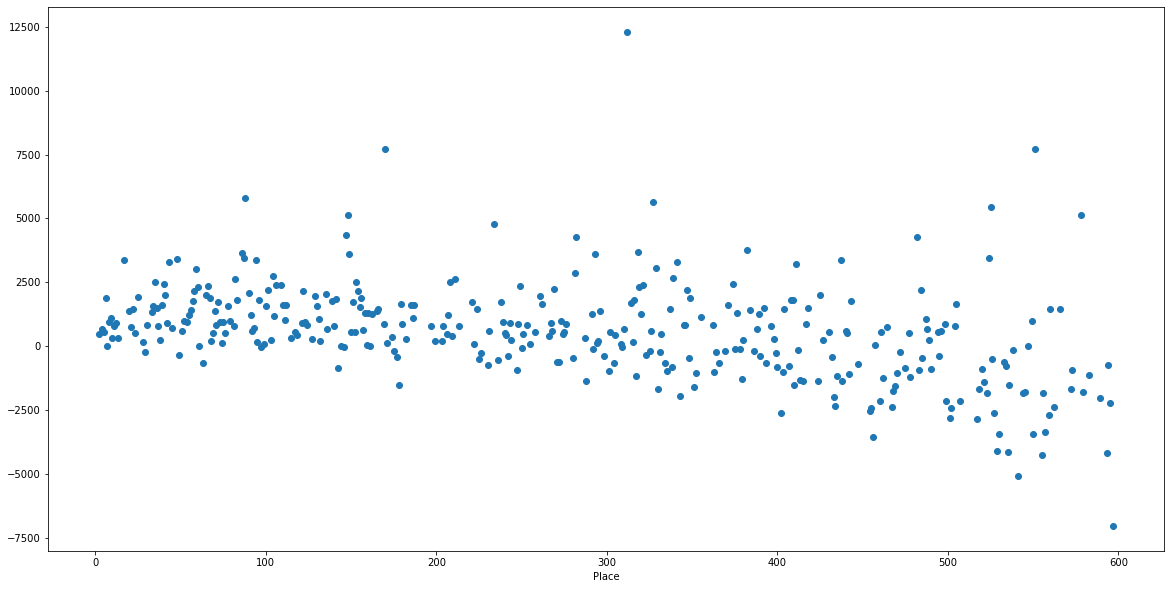

In [8]:
df_tunnel.plot(x='Place', y='Compare_Average_to_2019_Seconds', style='o', legend=None, figsize=(20,10))
# compares finish order with the time compared to average time

In [21]:
# find number of runners who beat their average
num_improved=(df_tunnel[df_tunnel['Compare_Average_to_2019_Seconds']>0].count()['Compare_Average_to_2019_Seconds'])
# find number of runners who had a previous time 
num_previous_time=(df_tunnel[df_tunnel['Compare_Average_to_2019_Seconds']!='NaN'].count()['Compare_Average_to_2019_Seconds'])
# find percentage of runners who beat their average 
print(f"Number of runners who improved their time: {num_improved}")
print(f"Runners with a previous time: {num_previous_time}")
print(f"percentage of runners with a previous time who improved at 2019 Tunnel Light: {num_improved/num_previous_time}")

Number of runners who improved their time: 242
Runners with a previous time: 358
percentage of runners with a previous time who improved at 2019 Tunnel Light: 0.6759776536312849


In [31]:
# find percentage of change between average and 2019 
df_tunnel['Percent_Change']=(((df_tunnel['Average']-df_tunnel['2019 Chip Time'])/df_tunnel['Average'])*100)
df_tunnel_new = df_tunnel[["Percent_Change"]]
display(df_tunnel_new)

,Percent_Change
0,NaN
1,4.648060
2,NaN
3,6.239613
4,5.181499
...,...
592,-3.123728
593,-10.334218
594,NaN
595,-39.426301


<AxesSubplot:xlabel='Place'>

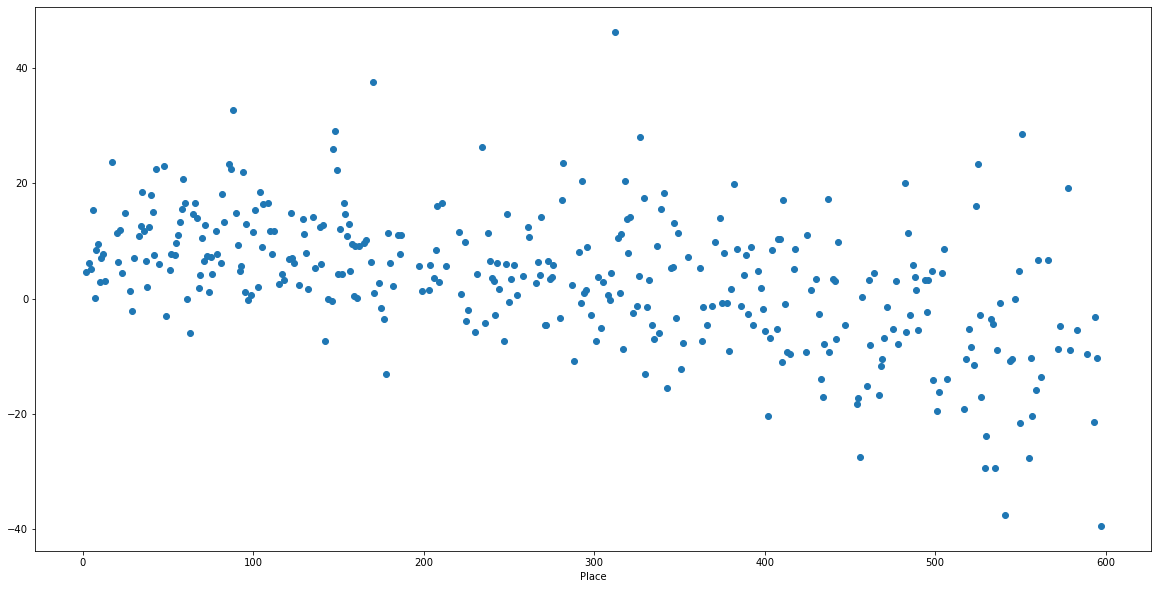

In [11]:
df_tunnel.plot(x='Place', y='Percent_Change', style='o', legend=None, figsize=(20,10))
# compares finish order with percentage change in time compared to average

In [12]:
# find average percent difference between average and 2019 Tunnel Light Marathon
df_tunnel["Percent_Change"].mean()

3.491647215603892

In [13]:
# find runner who beat their average by the most time
df_tunnel['Compare_Average_to_2019_Seconds'].argmax()

311

In [14]:
# find runner who beat their average by the most percent
df_tunnel['Percent_Change'].argmax()

311

In [15]:
# display information for the runner who beat their average by the most percent and time
df_tunnel.loc[[311]]

,Place,Name,Gender,Place .1,Age,Age Place,Unnamed: 6,2019 Gun Time,2019 Chip Time,2019 Pace,...,2016 Time,2015 Time,2014 Time,Average,Compare_Average_to_2019,Average_Seconds,Compare_Average_to_2019_Seconds,Average_Pretty,Compare_Average_to_2019_Pretty,Percent_Change
311,312,Todd Brown (# 130),F,202,68,3 / 6,NaN,03:58:22.500,0 days 03:58:19.700000,9:05/mile,...,NaT,NaT,NaT,0 days 07:23:25,0 days 03:25:05.300000,26605.0,12305.3,7h23m25s,3h25m5s,46.251832


In [16]:
# filter for runners with marathon times every year
df_tunnel_filtered = df_tunnel.dropna(subset=['2018 Time','2017 Time','2016 Time','2015 Time','2014 Time'])
display(df_tunnel_filtered)

,Place,Name,Gender,Place .1,Age,Age Place,Unnamed: 6,2019 Gun Time,2019 Chip Time,2019 Pace,...,2016 Time,2015 Time,2014 Time,Average,Compare_Average_to_2019,Average_Seconds,Compare_Average_to_2019_Seconds,Average_Pretty,Compare_Average_to_2019_Pretty,Percent_Change
1,2,Steven Michalski (# 521),M,2,50,1 / 60,NaN,02:45:36.200,0 days 02:45:35.100000,6:19/mile,...,0 days 02:52:16,0 days 02:47:11,0 days 02:53:21,0 days 02:53:39.400000,0 days 00:08:04.300000,10419.4,484.3,2h53m39s,8m4s,4.648060
3,4,Grant Drummond (# 224),M,4,42,1 / 28,NaN,02:51:08.700,0 days 02:51:07.700000,6:31/mile,...,0 days 03:21:02,0 days 02:56:10,0 days 03:08:36,0 days 03:02:31,0 days 00:11:23.300000,10951.0,683.3,3h2m31s,11m23s,6.239613
12,13,Gang Qin (# 634),M,13,55,1 / 43,NaN,02:57:23.800,0 days 02:57:21.600000,6:46/mile,...,0 days 03:01:35,0 days 03:04:53,0 days 03:08:02,0 days 03:02:56.200000,0 days 00:05:34.600000,10976.2,334.6,3h2m56s,5m34s,3.048414
19,20,Joshua Donoghue (# 867),M,20,39,4 / 25,NaN,03:00:20.600,0 days 03:00:16.100000,6:52/mile,...,0 days 03:15:00,0 days 03:27:12,0 days 03:34:11,0 days 03:23:29.600000,0 days 00:23:13.500000,12209.6,1393.5,3h23m29s,23m13s,11.413150
29,30,Cathy Cosner (# 179),F,3,46,2 / 48,NaN,03:04:12,0 days 03:04:07.600000,7:01/mile,...,0 days 03:20:23,0 days 03:18:06,0 days 03:24:59,0 days 03:18:07.800000,0 days 00:14:00.200000,11887.8,840.2,3h18m7s,14m0s,7.067750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,545,Pam Lonsdale (# 471),F,253,64,9 / 15,NaN,05:15:07.500,0 days 05:14:40.500000,12:00/mile,...,0 days 04:46:56,0 days 04:33:00,0 days 04:56:45,0 days 04:44:54.400000,-1 days +23:30:13.900000,17094.4,-1786.1,4h44m54s,-29m46s,-10.448451
545,547,Justin Blanchard (# 106),F,293,35,25 / 25,NaN,05:20:00.600,0 days 05:19:46,12:12/mile,...,0 days 04:48:13,0 days 05:40:48,0 days 06:09:24,0 days 05:19:51,0 days 00:00:05,19191.0,5.0,5h19m51s,5s,0.026054
547,549,Chip Bearden (# 93),F,295,68,6 / 6,NaN,05:20:46.400,0 days 05:20:27.500000,12:13/mile,...,0 days 06:30:25,0 days 05:29:25,0 days 04:53:55,0 days 05:36:34.800000,0 days 00:16:07.300000,20194.8,967.3,5h36m34s,16m7s,4.789847
553,555,Don Keren (# 416),F,297,64,40 / 40,NaN,05:27:32.200,0 days 05:27:20.800000,12:29/mile,...,0 days 04:10:13,0 days 03:55:32,0 days 03:58:15,0 days 04:16:24,-1 days +22:49:03.200000,15384.0,-4256.8,4h16m24s,-1h10m56s,-27.670307


In [17]:
# sort runners with yearly times by percent change 
df_tunnel_filtered_sorted = (df_tunnel_filtered.sort_values('Percent_Change', ascending=False))
display(df_tunnel_filtered_sorted)

,Place,Name,Gender,Place .1,Age,Age Place,Unnamed: 6,2019 Gun Time,2019 Chip Time,2019 Pace,...,2016 Time,2015 Time,2014 Time,Average,Compare_Average_to_2019,Average_Seconds,Compare_Average_to_2019_Seconds,Average_Pretty,Compare_Average_to_2019_Pretty,Percent_Change
81,82,Jun Chea (# 158),M,71,49,17 / 57,NaN,03:17:59.400,0 days 03:17:51.800000,7:33/mile,...,0 days 03:46:41,0 days 03:52:49,0 days 03:41:06,0 days 04:01:48.400000,0 days 00:43:56.600000,14508.4,2636.6,4h1m48s,43m56s,18.172921
280,281,Lawrence Barclay (# 81),F,187,64,19 / 40,NaN,03:52:06.700,0 days 03:51:16.300000,8:49/mile,...,0 days 04:45:49,0 days 04:35:57,0 days 04:07:00,0 days 04:38:44.400000,0 days 00:47:28.100000,16724.4,2848.1,4h38m44s,47m28s,17.029609
65,66,Terence Baptiste (# 80),M,58,51,4 / 60,NaN,03:14:52,0 days 03:14:45.600000,7:26/mile,...,0 days 03:56:57,0 days 03:59:56,0 days 04:09:53,0 days 03:53:43.200000,0 days 00:38:57.600000,14023.2,2337.6,3h53m43s,38m57s,16.669519
207,208,Alan Bull (# 133),F,146,56,23 / 43,NaN,03:41:22.500,0 days 03:41:00.500000,8:26/mile,...,0 days 04:39:49,0 days 04:27:43,0 days 04:44:29,0 days 04:23:07.600000,0 days 00:42:07.100000,15787.6,2527.1,4h23m7s,42m7s,16.006866
57,58,Winston Trice (# 785),M,51,46,10 / 57,NaN,03:13:39.300,0 days 03:13:25.700000,7:22/mile,...,0 days 03:30:43,0 days 04:06:12,0 days 04:32:54,0 days 03:49:13.200000,0 days 00:35:47.500000,13753.2,2147.5,3h49m13s,35m47s,15.614548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,501,Janet Green (# 310),F,224,65,2 / 6,NaN,04:48:41.900,0 days 04:48:39.100000,11:01/mile,...,0 days 04:04:52,0 days 04:02:24,0 days 03:53:13,0 days 04:01:28.600000,-1 days +23:12:49.500000,14488.6,-2830.5,4h1m28s,-47m10s,-19.536049
591,593,Claire Carder (# 149),F,288,66,6 / 6,NaN,06:33:27.800,0 days 06:32:57.900000,14:59/mile,...,0 days 05:16:58,0 days 04:47:00,0 days 05:06:39,0 days 05:23:33.800000,-1 days +22:50:35.900000,19413.8,-4164.1,5h23m33s,-1h9m24s,-21.449175
454,456,Larry Trimmer (# 786),F,265,49,51 / 57,NaN,04:33:58.800,0 days 04:33:45.800000,10:26/mile,...,0 days 03:16:04,0 days 03:40:49,0 days 03:39:45,0 days 03:34:48.400000,-1 days +23:01:02.600000,12888.4,-3537.4,3h34m48s,-58m57s,-27.446386
553,555,Don Keren (# 416),F,297,64,40 / 40,NaN,05:27:32.200,0 days 05:27:20.800000,12:29/mile,...,0 days 04:10:13,0 days 03:55:32,0 days 03:58:15,0 days 04:16:24,-1 days +22:49:03.200000,15384.0,-4256.8,4h16m24s,-1h10m56s,-27.670307


In [18]:
df_tunnel_filtered_sorted.to_csv('tunnel_filtered_sorted.csv')  # outputs .csv version

In [19]:
from IPython.display import FileLink
FileLink('./tunnel_filtered_sorted.csv', result_html_prefix="Click here to download: ")

/work/tunnel_filtered_sorted.csv